In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv', parse_dates=['dt'])
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [12]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [15]:
#data.to_pickle("data.pickle")

In [17]:
data.shape

(239177, 7)

In [18]:
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [19]:
data.isna().sum() / data.shape[0] * 100 

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [21]:
data.dropna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [23]:
data_prepared = data.dropna(axis=0, how='any')
print(data_prepared.shape)
print(data.shape)

(228175, 7)
(239177, 7)


In [24]:
data_prepared.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [25]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [26]:
# data_prepared["City"] # Series
# data_prepared[["City"]] # Data Frame

data_prepared[["City", "Country"]]

,City,Country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
239171,Xian,China
239172,Xian,China
239173,Xian,China
239174,Xian,China


In [72]:
# data_prepared["Country"].value_counts()

In [73]:
#data_prepared["Country"].value_counts().shape

In [31]:
data_prepared[data_prepared["Country"] == 'Turkey']

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96617,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [33]:
data_prepared[(data_prepared["Country"] == 'Turkey') | (data_prepared["Country"] == 'Brazil')]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [34]:
data_prepared[(data_prepared["Country"] == 'Turkey') & (data_prepared["AverageTemperature"] > 20)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
11900,1755-08-01,20.793,2.475,Ankara,Turkey,39.38N,33.29E
11910,1756-06-01,20.433,2.512,Ankara,Turkey,39.38N,33.29E
11911,1756-07-01,21.761,1.996,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96611,2012-10-01,21.292,0.574,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [47]:
data_selected = data_prepared[data_prepared["Country"].isin(["Turkey","Brazil","United States"])]

In [49]:
data_selected["Country"].value_counts()

Brazil           12139
Turkey            9239
United States     8237
Name: Country, dtype: int64

In [74]:
#data_selected.head()

In [50]:
data_selected.groupby(by="Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Turkey,13.790998,1.391654
United States,11.257246,1.200292


In [51]:
data_selected.groupby(by="Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E
United States,2013-09-01,29.141,10.193,New York,42.59N,87.27W


In [52]:
data_selected.groupby(by="Country").agg(['min','mean','max'])

AverageTemperature                     \
                             min       mean     max   
Country                                               
Brazil                    13.536  22.847555  29.986   
Turkey                    -6.280  13.790998  29.845   
United States             -9.162  11.257246  29.141   

              AverageTemperatureUncertainty                    
                                        min      mean     max  
Country                                                        
Brazil                                0.040  0.877419   5.277  
Turkey                                0.062  1.391654   8.459  
United States                         0.075  1.200292  10.193

In [61]:
tr_avg_temps = data_selected[data_selected["Country"] == "Turkey"]["AverageTemperature"]
br_avg_temps = data_selected[data_selected["Country"] == "Brazil"]["AverageTemperature"]
usa_avg_temps = data_selected[data_selected["Country"] == "United States"]["AverageTemperature"]

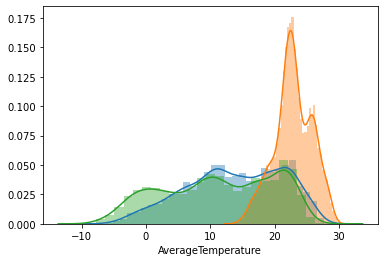

In [62]:
sns.distplot(tr_avg_temps)
sns.distplot(br_avg_temps)
sns.distplot(usa_avg_temps)

In [64]:
data_selected["Country"].unique()

array(['Turkey', 'Brazil', 'United States'], dtype=object)

In [65]:
countries = data_selected["Country"].unique()

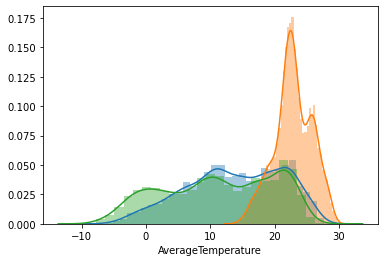

In [68]:
for c in countries:
    sns.distplot(data_selected[data_selected["Country"] == c]["AverageTemperature"])

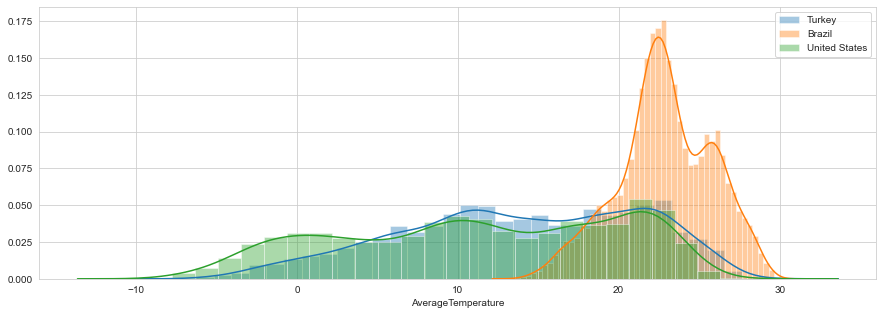

In [71]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))

for c in countries:
    sns.distplot(data_selected[data_selected["Country"] == c]["AverageTemperature"])
    
plt.legend(countries)